In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmm_discretization import Discrete_Model_Optimization
from data_collection import generate_parameters, paper_experiments
from means_and_covars import means_opts, covars_opts

### Testing results

Doing: random with MSE. Sample size=300. Grid size=5
Doing: grid with MSE. Sample size=300. Grid size=5
Doing: LH with MSE. Sample size=300. Grid size=5
Doing: Sobol with MSE. Sample size=300. Grid size=5
Doing: Halton with MSE. Sample size=300. Grid size=5
Doing: random with KLD. Sample size=300. Grid size=5
Doing: grid with KLD. Sample size=300. Grid size=5
Doing: LH with KLD. Sample size=300. Grid size=5
Doing: Sobol with KLD. Sample size=300. Grid size=5
Doing: Halton with KLD. Sample size=300. Grid size=5


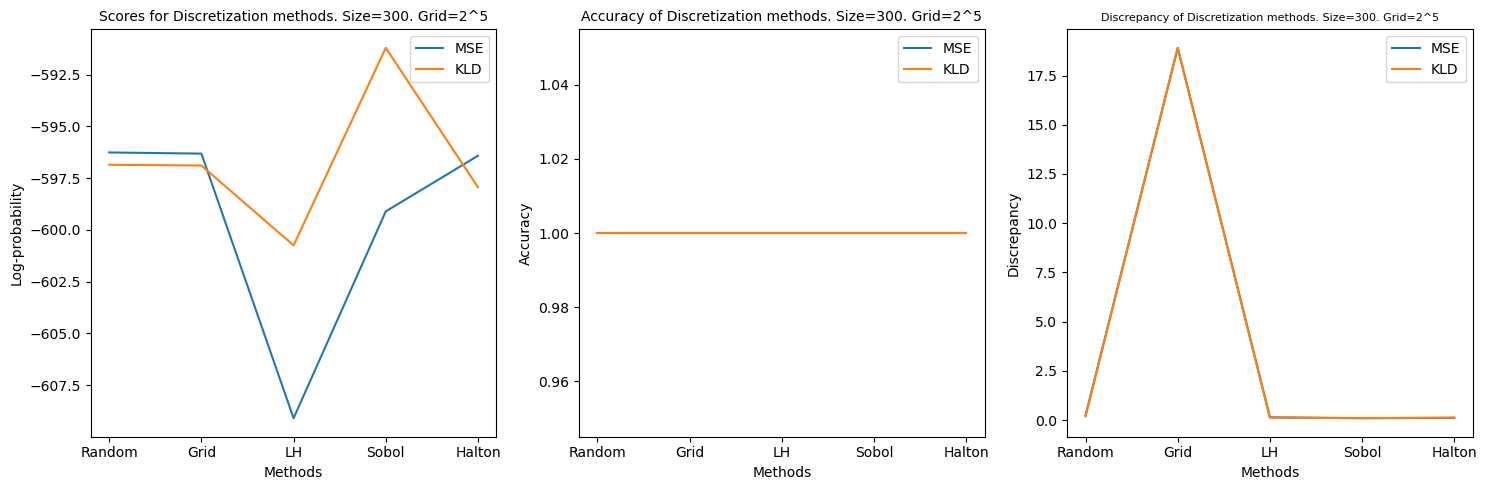

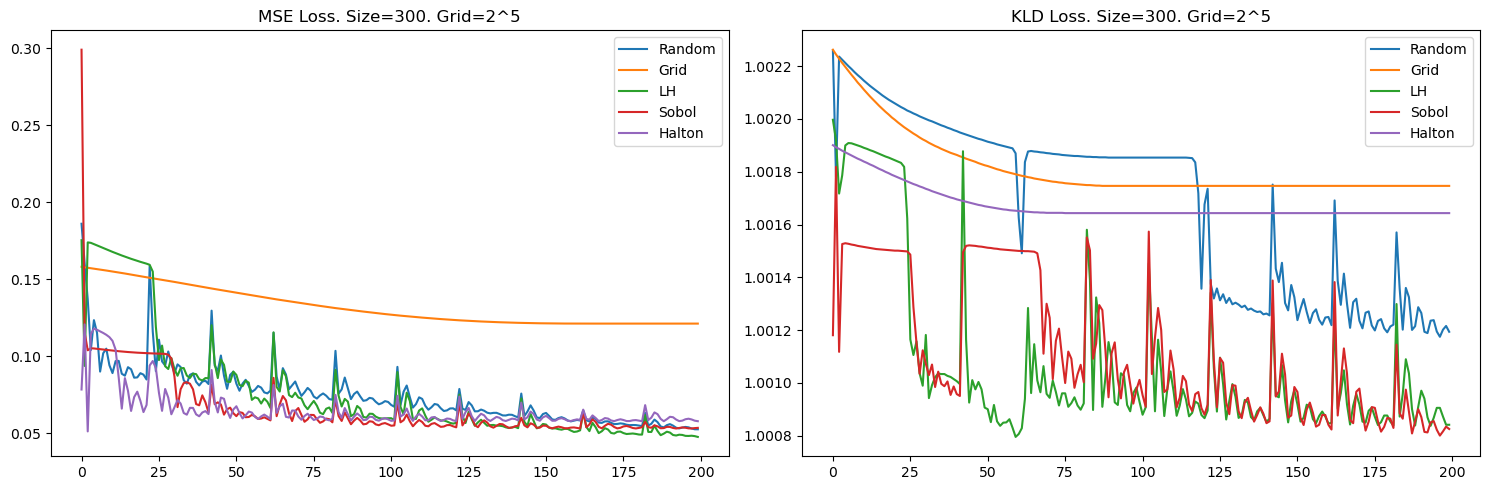

In [2]:
n_epochs = 1
n_dimensions = 10
n_hidden = 3
sample_sizes = [300]
grid_sizes = [5]
means, covars, startprob, transmat = generate_parameters(n_dimensions, n_hidden)
for sample_size in sample_sizes:
    for grid_size in grid_sizes:
        losses_all, scores_all, acc_all, discr_all, mod_opt = paper_experiments(sample_size,
                                                                                grid_size,
                                                                                n_dimensions,
                                                                                n_hidden,
                                                                                means_opts[f'means{n_hidden}_{n_dimensions}'],
                                                                                covars_opts[f'covars{n_hidden}_{n_dimensions}'],
                                                                                startprob,
                                                                                transmat, n_epochs)

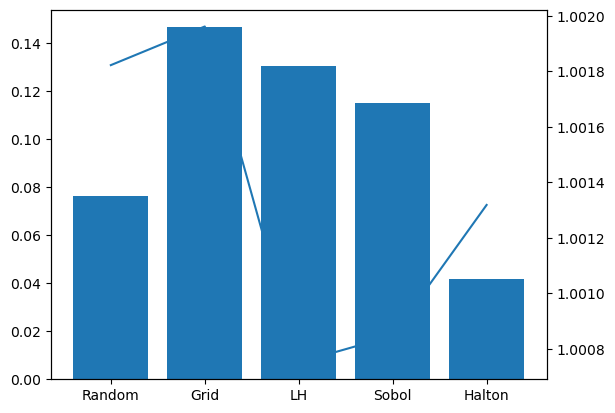

In [37]:
_, axes = plt.subplots()
axes2 = axes.twinx()
axes.bar(disc_methods, lss_values)
axes2.plot(disc_methods, lss_values2)

<BarContainer object of 5 artists>

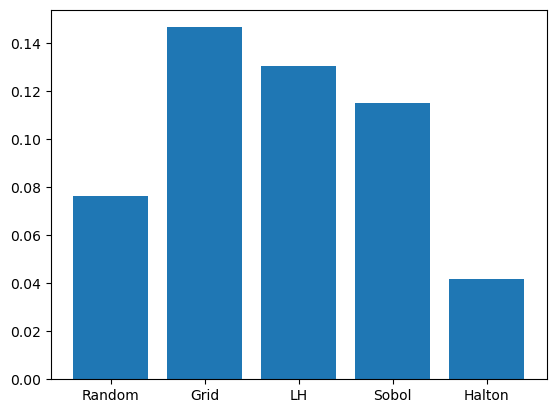

In [32]:
disc_methods = ['Random', 'Grid', 'LH', 'Sobol', 'Halton']
lss_values = losses_all[0:5]
lss_values2 = losses_all[5:10]
plt.bar(disc_methods, lss_values)

### Analyzing results

In [ ]:
dfnd_cols = ['2d_4', '2d_6', '2d_8', '3d_4', '3d_6', '3d_8', '5d_4', '5d_6', '5d_8', '8d_4', '8d_6', '8d_8', '10d_4_f', '10d_6_f', '10d_8_f', '10d_8_elim', '10d_6', '10d_8']
pop_cols = ['2d_4', '3d_4', '5d_4', '8d_4', '10d_4_f', '10d_6_f', '10d_8_f', '10d_8_elim']
dfnd = pd.read_csv('test_results/Results_testsND.csv')
dfnd.pop(dfnd.columns[0])
dfnd = dfnd.T
dfnd.columns = dfnd_cols
dfnd.drop(pop_cols, axis=1, inplace=True)
df_loss = dfnd.iloc[list(range(0, 39, 4))]
df_log_prob = dfnd.iloc[list(range(1, 39, 4))]
df_score = dfnd.iloc[list(range(2, 39, 4))]
df_discr = dfnd.iloc[list(range(3, 40, 4))]

In [55]:
def plot_results(metric, dim_list, name):
    disc_methods = ['Random', 'Grid', 'LH', 'Sobol', 'Halton']
    _, axes = plt.subplots(ncols=2, nrows=5, figsize=(10, 15))
    for c, n_dim in enumerate(dim_list):
        axes[c, 0].plot(metric[f'{n_dim}d_6'].iloc[0:5], label='Grid 2^6')
        axes[c, 0].plot(metric[f'{n_dim}d_8'].iloc[0:5], label='Grid 2^8')
        axes[c, 0].set_xticks(np.arange(len(disc_methods)), disc_methods, rotation=0)
        axes[c, 0].set_title(f'MSE {name} for {n_dim} Dimension observations')
        axes[c, 0].set_xlabel('Discretization Method')
        axes[c, 0].set_ylabel(name)
        axes[c, 0].legend()
        axes[c, 1].plot(metric[f'{n_dim}d_6'].iloc[5:10], label='Grid 2^6')
        axes[c, 1].plot(metric[f'{n_dim}d_8'].iloc[5:10], label='Grid 2^8')
        axes[c, 1].set_xticks(np.arange(len(disc_methods)), disc_methods, rotation=0)
        axes[c, 1].set_title(f'KLD {name} for {n_dim} Dimension observations')
        axes[c, 1].set_xlabel('Discretization Method')
        axes[c, 1].set_ylabel(name)
        axes[c, 1].legend()
    plt.tight_layout()
    plt.show()

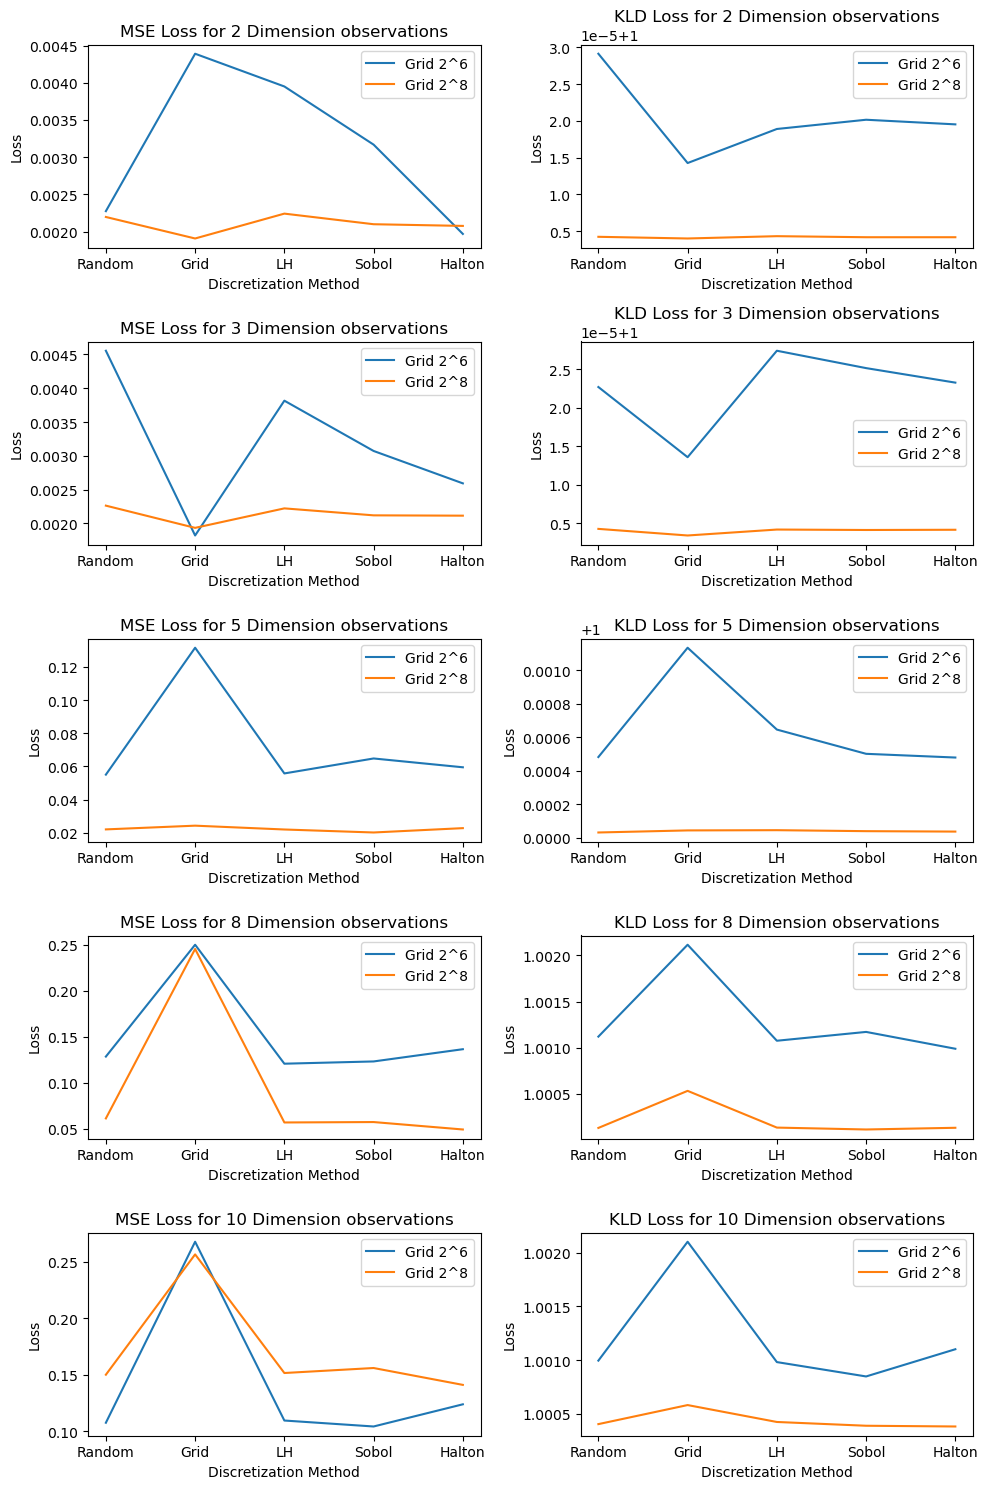

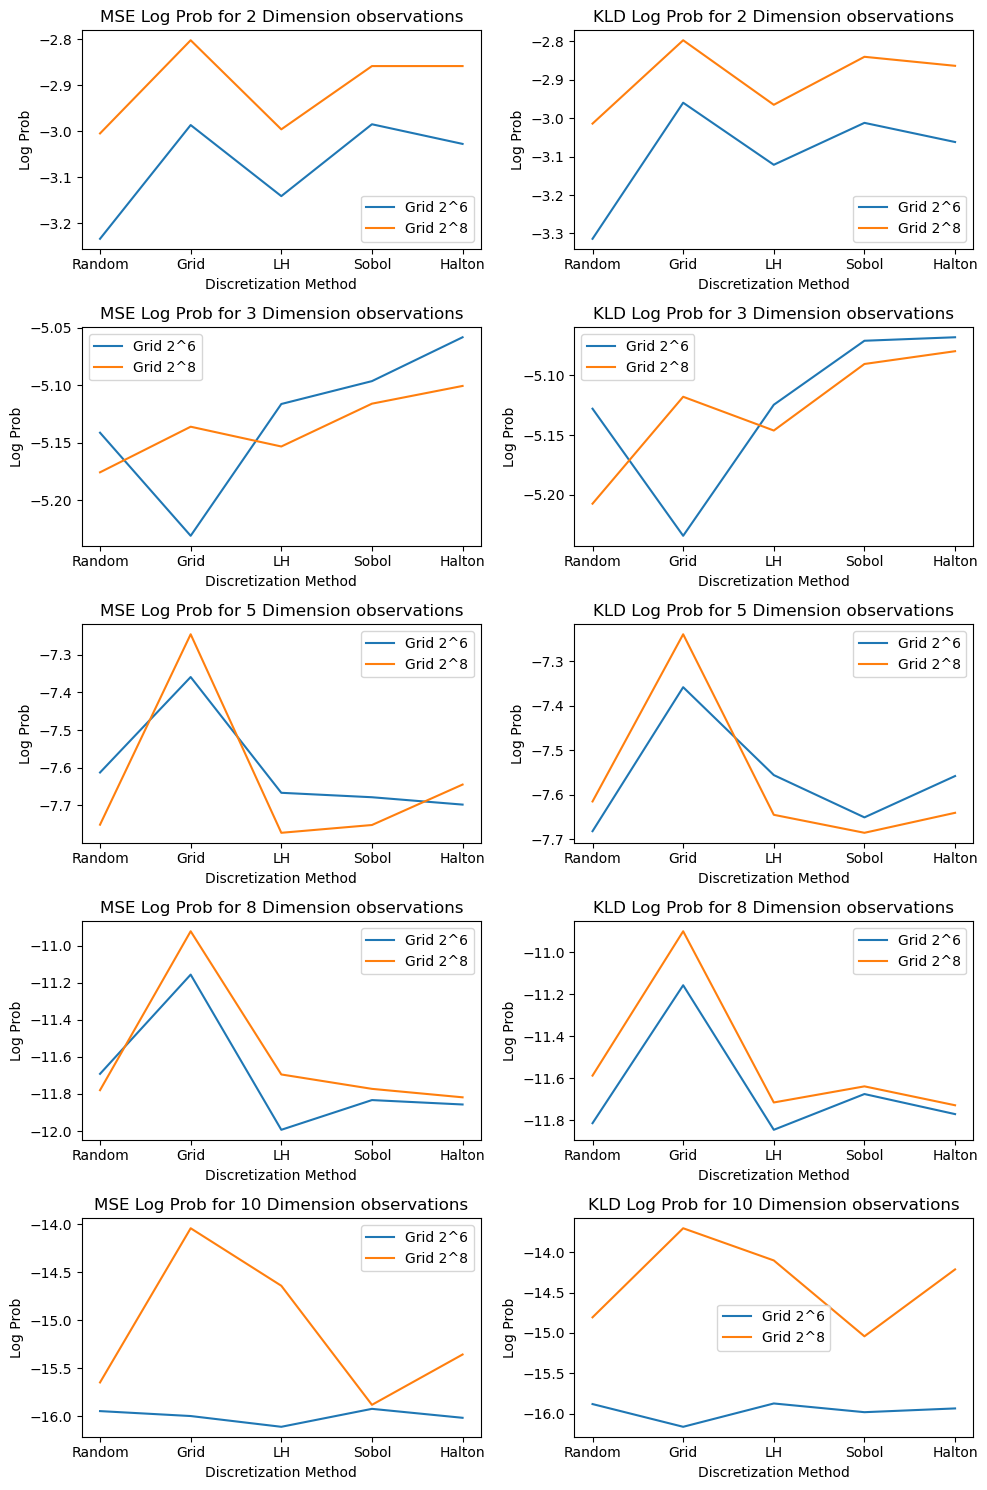

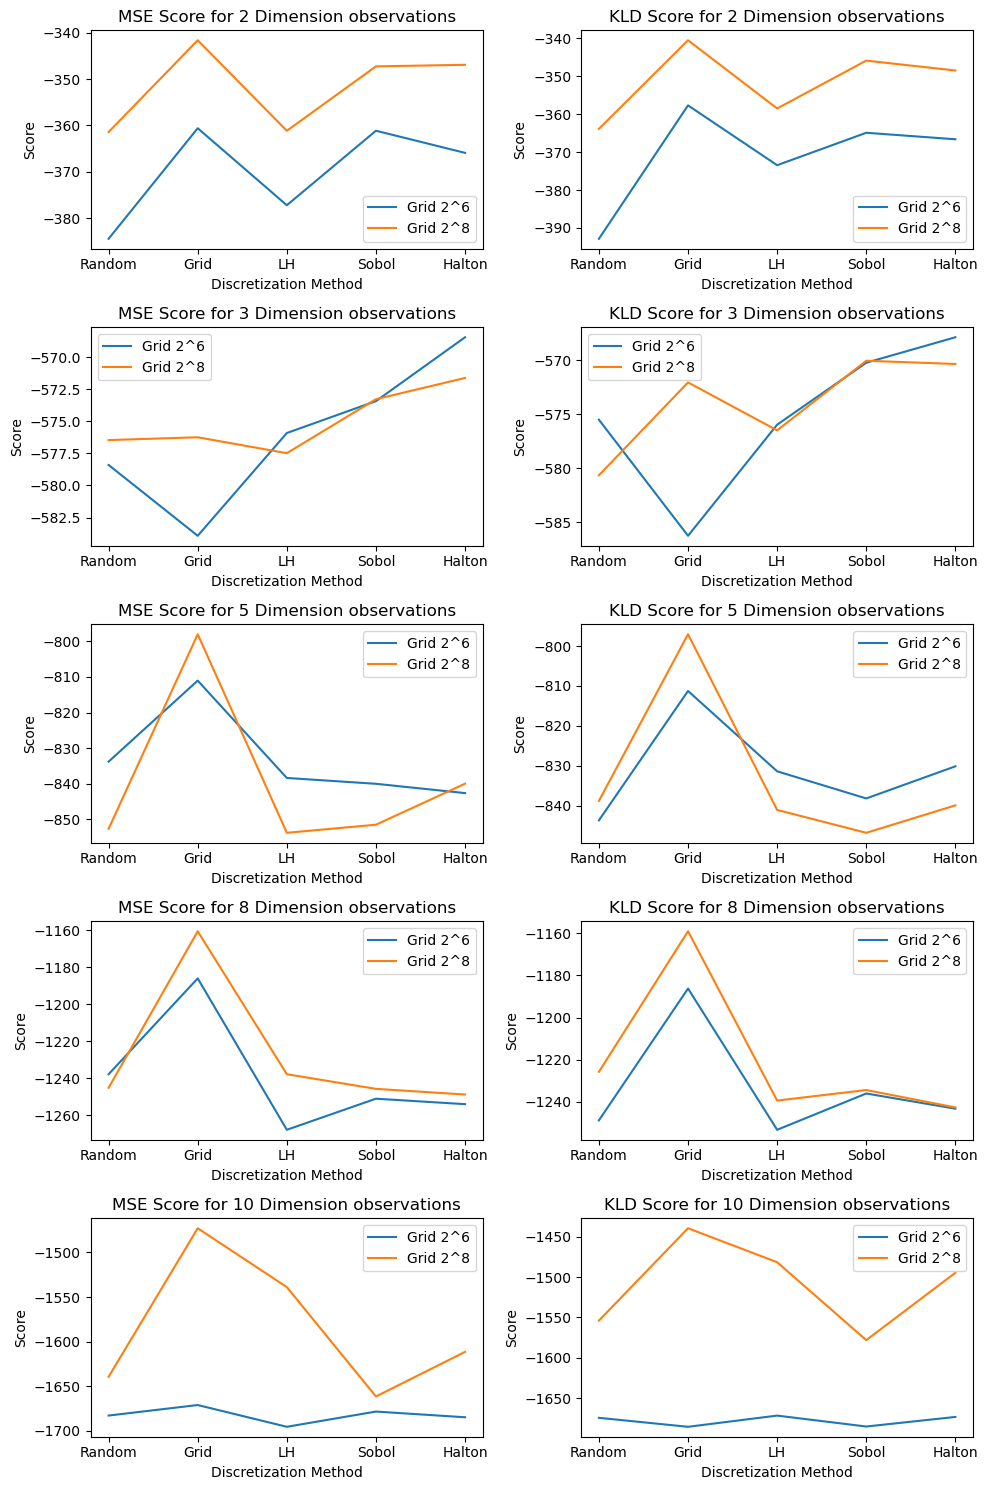

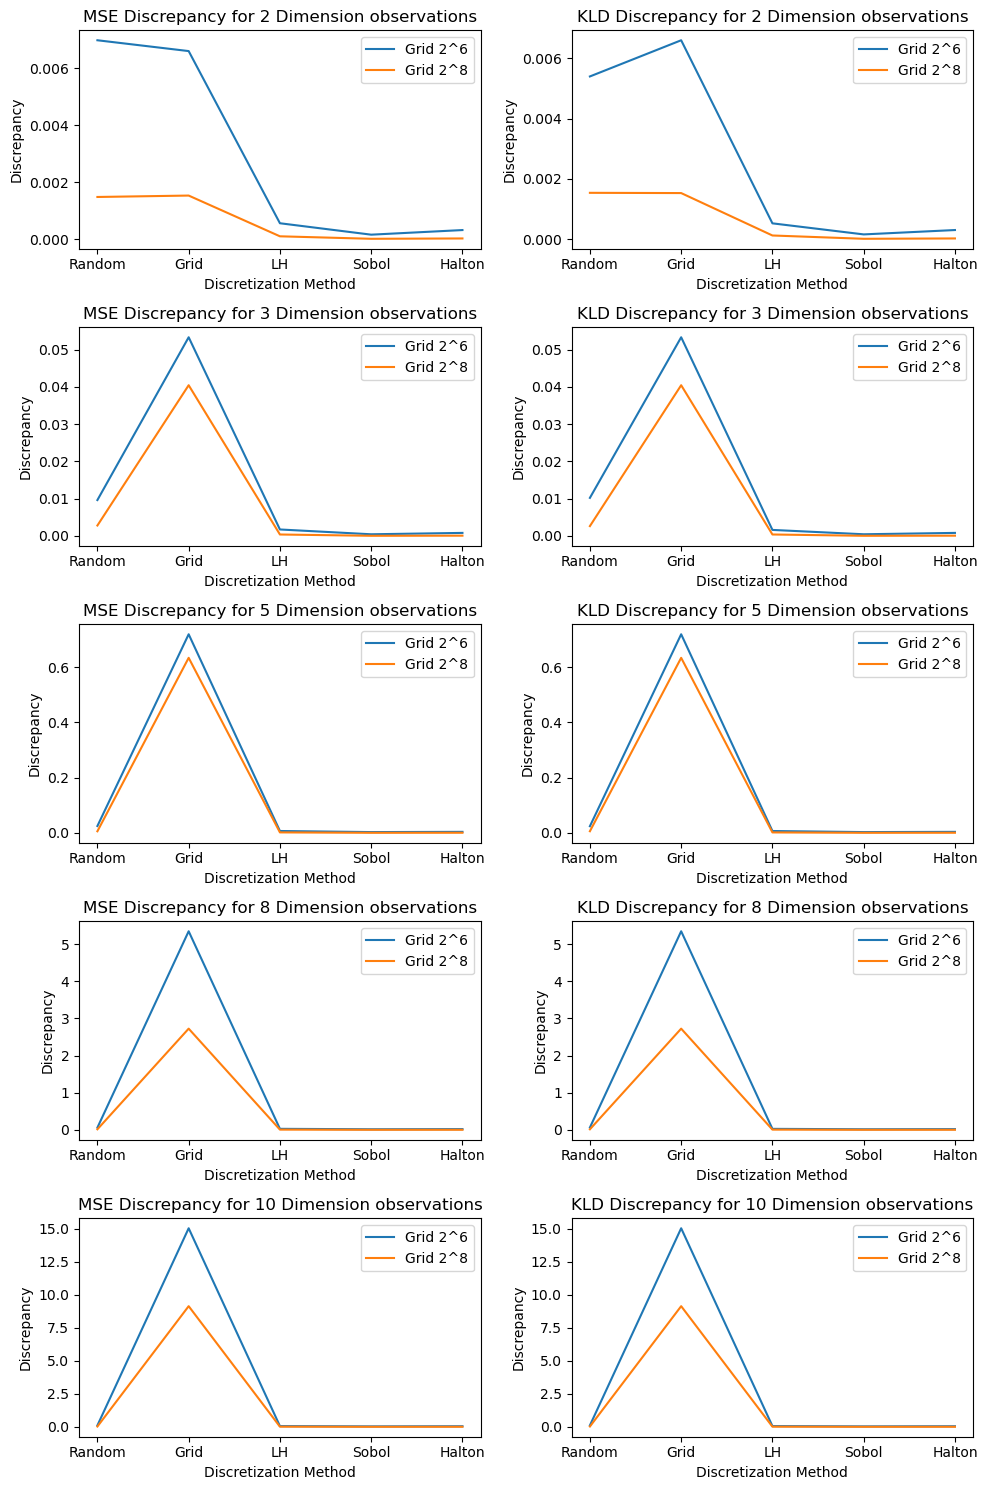

In [48]:
dim_list = [2, 3, 5, 8, 10]
plot_results(df_loss, dim_list, 'Loss')
plot_results(df_log_prob, dim_list, 'Log Prob')
plot_results(df_score, dim_list, 'Score')
plot_results(df_discr, dim_list, 'Discrepancy')